In [2]:
# prompt: kaggle datasets download -d ohagwucollinspatrick/ghana-crop-disease

!kaggle datasets download -d ohagwucollinspatrick/ghana-crop-disease

Dataset URL: https://www.kaggle.com/datasets/ohagwucollinspatrick/ghana-crop-disease
License(s): Attribution 4.0 International (CC BY 4.0)
100% 10.4G/10.4G [02:17<00:00, 159MB/s]
100% 10.4G/10.4G [02:17<00:00, 80.8MB/s]


In [3]:
!pip install tensorflow keras numpy matplotlib opencv-python scikit-learn

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
!unzip ghana-crop-disease.zip -d data

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data/images/id_axf8fk.jpg  
  inflating: data/images/id_axfwao.jpg  
  inflating: data/images/id_axjera.jpg  
  inflating: data/images/id_axktj2.jpg  
  inflating: data/images/id_axojpi.jpg  
  inflating: data/images/id_ay7lil.jpg  
  inflating: data/images/id_ay85js.jpg  
  inflating: data/images/id_ayd2my.jpg  
  inflating: data/images/id_ayeiia.jpg  
  inflating: data/images/id_ayklsb.jpg  
  inflating: data/images/id_azbboc.jpg  
  inflating: data/images/id_azkhqh.jpg  
  inflating: data/images/id_azriv5.jpg  
  inflating: data/images/id_azzp7g.jpg  
  inflating: data/images/id_b11ovu.jpg  
  inflating: data/images/id_b15b2l.jpg  
  inflating: data/images/id_b1awql.jpg  
  inflating: data/images/id_b1e9sg.jpg  
  inflating: data/images/id_b1mlcd.jpg  
  inflating: data/images/id_b1sv9d.jpg  
  inflating: data/images/id_b2do8m.jpg  
  inflating: data/images/id_b2e92m.jpg  
  inflating: data/im

In [17]:
import pandas as pd

# Charger les fichiers CSV
train = pd.read_csv('/content/data/Train.csv')
test = pd.read_csv('/content/data/Test.csv')

# Afficher les premières lignes du fichier d'entraînement
print("Train Data:")
print(train.head())

# Afficher les premières lignes du fichier de test
print("\nTest Data:")
print(test.head())

# Afficher les informations sur les colonnes
print("\nTrain Data Info:")
print(train.info())


Train Data:
        Image_ID  confidence                  class         ymin        xmin  \
0  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   194.649671  328.803454   
1  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   149.632401  256.768914   
2  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   234.046875  327.138158   
3  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   221.277138  340.411184   
4  id_11ee1c.jpg         1.0        Pepper_Fusarium  2000.563598  989.588908   

          ymax         xmax  
0   208.107730   341.967928  
1   162.910362   266.195724  
2   252.712993   338.876645  
3   238.593750   354.651316  
4  2184.252196  1401.748952  

Test Data:
        Image_ID  confidence  class  ymin  xmin  ymax  xmax
0  id_128pxx.jpg         NaN    NaN   NaN   NaN   NaN   NaN
1  id_12jbci.jpg         NaN    NaN   NaN   NaN   NaN   NaN
2  id_143s4o.jpg         NaN    NaN   NaN   NaN   NaN   NaN
3  id_14tfmb.jpg         NaN    NaN   NaN   NaN   NaN   NaN
4  id_14tw4o.jp

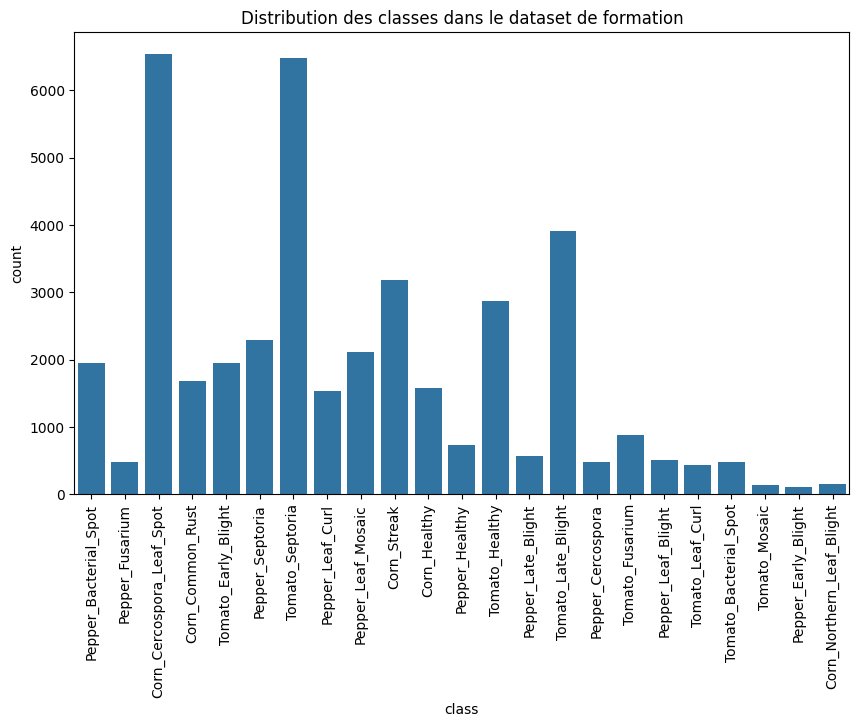

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
#train = pd.read_csv('/content/Train.csv')

# Visualiser la distribution des classes
plt.figure(figsize=(10,6))
sns.countplot(x='class', data=train)
plt.title('Distribution des classes dans le dataset de formation')
plt.xticks(rotation=90)
plt.show()

# Analyser les dimensions des images (si disponibles)
train['image_path'] = '/content/images/' + train['Image_ID']


In [19]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler


# Identifier les colonnes de caractéristiques et la cible
X = train.drop(columns=['class'])  # Ici, "label" est supposé être la colonne cible, ajuste selon ton dataset
y = train['class']  # Colonne des classes cibles

# Vérifier la distribution des classes avant le sur-échantillonnage
print("\nDistribution des classes avant over-sampling:")
print(y.value_counts())

# Appliquer le Random Over-Sampling pour équilibrer les classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Créer un nouveau DataFrame après over-sampling
train_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['class'])], axis=1)

# Vérifier la distribution des classes après le sur-échantillonnage
print("\nDistribution des classes après over-sampling:")
print(train_resampled['class'].value_counts())

# Afficher les premières lignes du nouveau dataset sur-échantillonné
print("\nTrain Data Resampled:")
print(train_resampled.head())



Distribution des classes avant over-sampling:
class
Corn_Cercospora_Leaf_Spot    6538
Tomato_Septoria              6483
Tomato_Late_Blight           3918
Corn_Streak                  3180
Tomato_Healthy               2872
Pepper_Septoria              2295
Pepper_Leaf_Mosaic           2113
Tomato_Early_Blight          1946
Pepper_Bacterial_Spot        1943
Corn_Common_Rust             1682
Corn_Healthy                 1571
Pepper_Leaf_Curl             1530
Tomato_Fusarium               882
Pepper_Healthy                736
Pepper_Late_Blight            575
Pepper_Leaf_Blight            508
Tomato_Bacterial_Spot         484
Pepper_Cercospora             472
Pepper_Fusarium               472
Tomato_Leaf_Curl              437
Corn_Northern_Leaf_Blight     157
Tomato_Mosaic                 134
Pepper_Early_Blight           101
Name: count, dtype: int64

Distribution des classes après over-sampling:
class
Pepper_Bacterial_Spot        6538
Tomato_Healthy               6538
Pepper_Early_Bligh

In [ ]:
#  utiliser les données sur-échantillonnées avec un modèle ResNet dans TensorFlow

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# ... (Le code précédent pour charger les données et sur-échantillonner reste le même) ...


# Préparer les données pour ResNet (redimensionnement, normalisation)
img_height, img_width = 224, 224  # Taille d'entrée pour ResNet
batch_size = 32


def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_height, img_width))
    img = img / 255.0  # Normalisation
    return img


# Charger les images et les étiquettes correspondantes
images = []
labels = []

for index, row in train_resampled.iterrows():
    image_path = '/content/data/images/' + row['Image_ID']
    if os.path.exists(image_path):
        try:
            img = load_and_preprocess_image(image_path)
            images.append(img)
            labels.append(row['class'])
        except Exception as e:
            print(f"Erreur lors du chargement de l'image {image_path}: {e}")

# Convertir en tableaux numpy
X_train = np.array(images)
y_train = np.array(labels)


# Créer le modèle ResNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ajouter des couches personnalisées pour la classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Couche dense intermédiaire
predictions = Dense(len(np.unique(y_train)), activation='softmax')(x)  # Couche de sortie avec softmax

model = Model(inputs=base_model.input, outputs=predictions)

# Geler les poids du modèle de base ResNet
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Débloquer les poids de quelques couches supérieures de ResNet pour un apprentissage plus fin
for layer in model.layers[-5:]:
    layer.trainable = True

# Compiler à nouveau le modèle avec un taux d'apprentissage plus faible
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle avec les couches débloquées
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Évaluer le modèle (sur un ensemble de test distinct si disponible)
# ...